# ДЗ 2 по ML
*by Чернятин Александр*

## Импорты

In [56]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    !wget -q -O requirements.txt https://raw.githubusercontent.com/andriygav/MachineLearningSeminars/master/sem1/requirements.txt
    !pip install -q -r requirements.txt

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [58]:
import pandas as pd
url='https://drive.google.com/file/d/1pA4pnIx3quQe55kXHZeZjmk_-Qj8KdBq/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [59]:
import pandas as pd
url='https://drive.google.com/file/d/1q75J88xmvU4nELyfUne3ph9oUx3Z60Mi/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_u = pd.read_csv(url)

## Подготовка и анализ данных

Проверим, что все корректно загрузилось

In [60]:
df.head()

,Id,Category,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100
0,0,459.509469,-0.328499,1.175144,0.515354,0.293739,0.717413,0.499106,-0.163973,-0.356333,...,-0.069074,0.163611,0.827213,-0.766158,0.628716,0.608708,0.895262,-0.430845,0.222054,-1.378243
1,1,681.872699,-0.464213,1.104540,-0.489935,-0.956223,-0.280793,0.005371,1.176738,0.158388,...,0.528232,0.963157,0.673927,0.271933,-1.245576,0.451102,-0.876329,0.099235,-2.883061,0.219429
2,2,2087.125600,-1.547788,1.717030,-0.829589,0.661784,-0.537492,0.147143,0.359703,-0.163511,...,-1.871161,1.509097,-0.330102,-1.290021,-0.313704,0.064516,1.056933,1.029114,-1.197726,0.317935
3,3,663.957725,0.351038,-0.070387,0.253418,-0.199843,-0.811106,0.338446,0.658384,0.808466,...,0.065048,0.333310,-1.605971,0.963046,-1.889288,-1.079422,-0.695426,0.096945,-1.142165,0.377868
4,4,2903.251134,-1.081837,-2.220129,0.422766,-2.795604,-1.065393,-0.378428,0.929238,-0.381571,...,-1.322272,0.352543,-1.292785,-1.270267,0.762935,-0.784592,1.183498,-0.260315,2.517893,0.713963


In [61]:
df_u.head()

,Id,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100
0,0,0.316942,1.644450,-1.049730,-0.917688,-1.235205,0.162192,-0.631035,0.359445,-0.231481,...,-1.583830,1.347389,0.313076,3.301484,-1.961382,-0.049537,-0.981606,1.957440,1.319010,0.070333
1,1,-0.739079,-2.422455,-1.212343,2.322217,-0.460501,3.135261,0.279431,-0.549328,1.051281,...,1.551599,-0.384965,0.391077,-0.176370,1.538562,-1.699737,0.702298,0.829514,-0.064617,-0.275268
2,2,-0.541835,1.810515,1.735539,0.260166,1.414195,-0.438479,-0.784220,0.437135,0.694371,...,-0.457030,-0.051940,0.242659,-1.588924,0.022063,-0.514721,-2.014138,-1.638644,-0.126562,0.702399
3,3,1.136659,-1.088907,-1.015267,0.780997,0.722492,-1.390425,0.273382,0.674770,-0.046709,...,0.068821,-1.393991,0.385473,0.458625,1.470197,0.967956,0.553880,-0.039561,0.385272,-0.064552
4,4,-0.732164,-0.795239,0.471453,-0.767648,1.610427,1.191031,1.601433,0.893737,-0.509399,...,-0.651896,-0.538936,0.146088,0.085751,1.219601,-0.266557,-1.361319,-0.754607,-1.104216,-0.364474


Делаем train test сплит

In [62]:
from sklearn.model_selection import train_test_split

raw_train, raw_test = train_test_split(df.drop(columns=['Id']), test_size=0.2, random_state=42)

Смотрим верхние пять строчек train

In [63]:
raw_train.head()

,Category,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100
6317,1764.159262,1.359567,2.285166,1.265628,0.564745,0.438637,-0.278692,-0.045044,-0.907396,0.815738,...,-0.377536,0.315124,1.184359,0.369710,0.027708,0.793266,-0.248960,0.279863,1.479929,1.629048
740,932.071234,0.677241,0.554194,2.069604,2.190246,-0.935997,1.510102,-0.827153,1.148456,-0.785813,...,2.057227,-1.242910,-0.895739,-0.527946,0.452002,1.111332,0.873159,0.274652,-0.865402,0.948898
3781,2657.326300,-0.262793,0.655055,-2.182432,1.099346,0.939665,-1.026625,-0.316727,0.267779,-1.467106,...,-2.152531,-1.066392,-1.504465,1.388402,1.794803,-0.221972,0.594474,-1.467993,1.193360,1.691429
7850,254.982738,1.060386,1.053031,0.100133,0.367571,1.115634,-0.767255,-2.447309,0.354439,0.722331,...,-0.740365,1.060530,-1.097196,0.567550,-0.544886,-2.018571,1.481151,-0.132114,0.983274,0.507098
2963,606.627225,0.051482,-0.348747,0.299856,-2.391731,1.938980,1.366270,-0.275757,-0.377647,0.028956,...,0.976763,0.187856,-0.946831,1.188607,0.753818,0.778817,1.460893,0.608421,1.130805,0.582608


Посмотрим на распределение целевого параметра в выборке:

<Axes: xlabel='Category', ylabel='Density'>

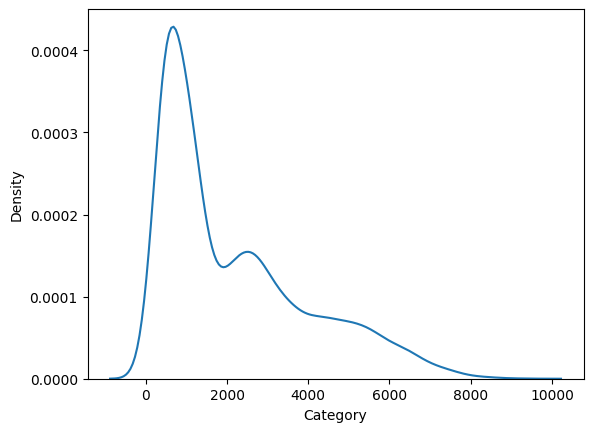

In [64]:
sns.kdeplot(data=raw_train, x="Category")

Распределение весьма загадочное, построим матрицу корреляций признаков

<Axes: >

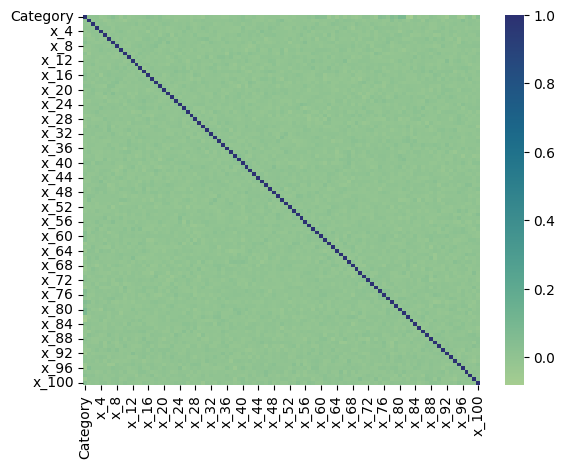

In [65]:
sns.heatmap(raw_train.corr(), cmap='crest')

Данные не коррелированы или корреляция принебрежимо мала. Также довольно малое количество признаков коррелирует с целевым значением, что отражает сложность построения модели.

*Возможны визуальные баги, рекоммендуется разбить график на 2, в случае их появления и посмотреть на две половины по отдельности*

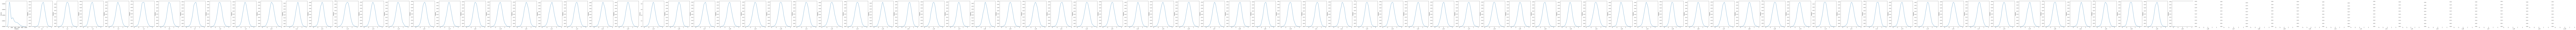

In [66]:
fig, axs = plt.subplots(figsize=(500, 5), ncols=101)
i = 0
for column_name in list(raw_train.columns):
  sns.kdeplot(data=raw_train, x=column_name, ax=axs[i])
  i += 1

Нетрудно заметить, что все признаки схожи, имеют медиану примерно 0 и визуально напоминают нормальное распределение.

Таким образом данные не нуждаются в предварительной обработке и можно приступать к тренировке модели

In [67]:
train = raw_train
test = raw_test

X_train = train.drop(columns=['Category'])
y_train = train['Category']

X_test = test.drop(columns=['Category'])
y_test = test['Category']

## Препроцессинг и обучение

###Стандартные методы

Сначала попробуем напрямую применить несколько популярных методов. Хорошим предположением будет также, что в качестве ошибки осмысленно использовать MSE, так как именно она используется в условии задания.

In [68]:
from sklearn.metrics import mean_squared_error

### Базовый класификатор

Для проверки эффективности всех методов сначала создадим dummy regressor и оценим его эффективность

In [69]:
from sklearn.dummy import DummyRegressor

In [70]:
dum_model = DummyRegressor()

In [71]:
dum_model.fit(X_train, y_train)

DummyRegressor()

In [72]:
dummy_mse = mean_squared_error(y_test, dum_model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(dummy_mse))

The mean squared error (MSE) on test set: 3258092.3378


###Линейная регрессия

Сначала попробуем использовать линейную регрессию.

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lr_model = LinearRegression()

In [75]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [76]:
mse = mean_squared_error(y_test, lr_model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("It's {:.4f} times better than the dummy model".format(dummy_mse/mse))

The mean squared error (MSE) on test set: 3199918.2992
It's 1.0182 times better than the dummy model


###Стохастический градиентный спук

Пробуем SGD

In [77]:
from sklearn.linear_model import SGDRegressor

In [78]:
sdg_model = SGDRegressor()

In [79]:
sdg_model.fit(X_train, y_train)

SGDRegressor()

In [80]:
mse = mean_squared_error(y_test, sdg_model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("It's {:.4f} times better than the dummy model".format(dummy_mse/mse))

The mean squared error (MSE) on test set: 3205748.4434
It's 1.0163 times better than the dummy model


###Многослойный перцептрон

In [81]:
from sklearn.neural_network import MLPRegressor

In [82]:
mlp_model = MLPRegressor()

In [83]:
mlp_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [84]:
mse = mean_squared_error(y_test, mlp_model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("It's {:.4f} times better than the dummy model".format(dummy_mse/mse))

The mean squared error (MSE) on test set: 3259321.1610
It's 0.9996 times better than the dummy model


###Неподходящие стандартные методы

Проверим пару менее подходящих методов, просто на всякий случай

###SVR

In [85]:
from sklearn.svm import SVR

In [86]:
svr_model = SVR()

In [87]:
svr_model.fit(X_train, y_train)

SVR()

In [88]:
mse = mean_squared_error(y_test, svr_model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("It's {:.4f} times better than the dummy model".format(dummy_mse/mse))

The mean squared error (MSE) on test set: 3847711.6454
It's 0.8468 times better than the dummy model


###Надарая-Ватсона

In [89]:
from sklearn.kernel_ridge import KernelRidge

In [90]:
krr_model = KernelRidge()

In [91]:
krr_model.fit(X_train, y_train)

KernelRidge()

In [92]:
mse = mean_squared_error(y_test, krr_model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("It's {:.4f} times better than the dummy model".format(dummy_mse/mse))

The mean squared error (MSE) on test set: 7989809.4995
It's 0.4078 times better than the dummy model


###Линейная регрессия на основе признака x81

В качестве эксперимента попробуем линейную регрессию по самому коррелированному с Category признаку.

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
lr81_model = LinearRegression()

In [114]:
lr81_model.fit(X_train.iloc[:,80:81], y_train)

LinearRegression()

In [116]:
mse = mean_squared_error(y_test, lr81_model.predict(X_test.iloc[:,80:81]))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("It's {:.4f} times better than the dummy model".format(dummy_mse/mse))

The mean squared error (MSE) on test set: 3235075.9379
It's 1.0071 times better than the dummy model


## Результат

Используем лучшую модель на тестовых данных, перетренировав на полной тренировочной выборке без train/test сплит, для лучшего значения

На данный момент лучшей моделью является Линейная Регрессия

In [93]:
model = MLPRegressor()

X = df.drop(columns=['Category', 'Id'])
y = df['Category']

model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
res = lr_model.predict(df_u.drop(columns=['Id']))
predictions = pd.DataFrame(res)
predictions.to_csv('/content/drive/My Drive/predictions.csv', index=True)

Неожиданно, самая простая модель оказалась наиболее эффективной. Среди стандартных методов разница в результатах невелика, но LR вырывается вперед на самую малость, скорее всего за счет особенностей синтетической выборки и удачного стечения обстоятельств.